# 7. Micro-Laboratorio (Ejercicio Práctico)

**Consigna:**

Usando las `reviews` y las funciones de preprocesamiento de clases previas (o volviendo a procesarlas ahora):
1.  Asegúrate de tener la lista de `reviews_preprocesadas` (cada elemento es un string con los lemas unidos por espacios). Si no la tenés, generála usando la función `preprocesar_texto_para_vectorizar` sobre las `reviews` originales.
2.  **Crear Matriz BoW:**
    *   Instancia un `CountVectorizer`.
    *   Aplícalo a las `reviews_preprocesadas` usando `fit_transform()`.
    *   Obtén el vocabulario (`get_feature_names_out()`).
    *   Crea un DataFrame de Pandas para visualizar la matriz BoW.
3.  **Crear Matriz TF-IDF:**
    *   Instancia un `TfidfVectorizer`.
    *   Aplícalo a las **mismas** `reviews_preprocesadas` usando `fit_transform()`.
    *   **Importante:** Para comparar fácil, puedes pasarle el vocabulario aprendido por el CountVectorizer al TfidfVectorizer usando el argumento `vocabulary=`. O viceversa. La idea es que ambas matrices usen las mismas columnas en el mismo orden.
    *   Crea un DataFrame de Pandas para visualizar la matriz TF-IDF (redondea los valores a 3 decimales).
4.  **Analizar:**
    *   Imprime ambas matrices.
    *   Elige una o dos reviews. ¿Qué palabras tienen los pesos más altos en TF-IDF para esa review? ¿Coincide con lo que esperarías que sean las palabras clave de esa review?
    *   Busca alguna palabra que tenga un conteo > 0 en BoW pero un peso TF-IDF relativamente bajo. ¿Por qué podría ser? (Pista: ¿aparece en muchas reviews?).

In [ ]:
# Dataset (el mismo del martes)
reviews = [
    "Una película emocionante con actuaciones brillantes. ¡Me encantó!",
    "Muy aburrida y lenta. El guión era predecible y los actores no convencían.",
    "Los efectos especiales fueron impresionantes, pero la historia dejaba mucho que desear.",
    "¡Qué gran comedia! Me reí sin parar durante toda la película.",
    "Un documental necesario que aborda temas importantes con profundidad y sensibilidad."
]

In [ ]:
# 1. Importamos librerías necesarias
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# 2. Cargamos modelo spaCy
nlp = spacy.load("es_core_news_sm")

# 3. Dataset de reseñas
reviews = [
    "Una película emocionante con actuaciones brillantes. ¡Me encantó!",
    "Muy aburrida y lenta. El guión era predecible y los actores no convencían.",
    "Los efectos especiales fueron impresionantes, pero la historia dejaba mucho que desear.",
    "¡Qué gran comedia! Me reí sin parar durante toda la película.",
    "Un documental necesario que aborda temas importantes con profundidad y sensibilidad."
]

# 4. Personalizamos stopwords
STOP_WORDS.update(["película", "film", "cine"])
STOP_WORDS.discard("necesario")  # palabra importante en contexto

# 5. Función para preprocesar texto
def preprocesar_texto_para_vectorizar(texto):
    doc = nlp(texto)
    lemas = [token.lemma_ for token in doc
             if not token.is_stop and token.is_alpha and token.pos_ in ['NOUN', 'ADJ']]
    return " ".join(lemas)

# 6. Aplicamos función a las reviews
reviews_preprocesadas = [preprocesar_texto_para_vectorizar(r) for r in reviews]

# 7. CountVectorizer (BoW)
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(reviews_preprocesadas)
vocabulario = vectorizer_bow.get_feature_names_out()

# 8. Visualizamos matriz BoW
df_bow = pd.DataFrame(X_bow.toarray(), columns=vocabulario)
print("Matriz BoW:")
print(df_bow)

# 9. TfidfVectorizer (usando el mismo vocabulario)
vectorizer_tfidf = TfidfVectorizer(vocabulary=vocabulario)
X_tfidf = vectorizer_tfidf.fit_transform(reviews_preprocesadas)

# 10. Visualizamos matriz TF-IDF
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vocabulario)
df_tfidf = df_tfidf.round(3)
print("\nMatriz TF-IDF:")
print(df_tfidf)


Matriz BoW:
   aburrido  actor  actuación  brillante  comedia  documental  efecto  \
0         0      0          1          1        0           0       0   
1         1      1          0          0        0           0       0   
2         0      0          0          0        0           0       1   
3         0      0          0          0        1           0       0   
4         0      0          0          0        0           1       0   

   emocionante  especial  guión  historia  importante  impresionante  lento  \
0            1         0      0         0           0              0      0   
1            0         0      1         0           0              0      1   
2            0         1      0         1           0              1      0   
3            0         0      0         0           0              0      0   
4            0         0      0         0           1              0      0   

   necesario  predecible  profundidad  sensibilidad  tema  
0          0  

In [ ]:
print("Conteo en BoW:")
print(df_bow["historia"])

print("\nPeso TF-IDF:")
print(df_tfidf["historia"])


Conteo en BoW:
0    0
1    0
2    1
3    0
4    0
Name: historia, dtype: int64

Peso TF-IDF:
0    0.0
1    0.0
2    0.5
3    0.0
4    0.0
Name: historia, dtype: float64


In [ ]:
!pip install wordcloud matplotlib


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

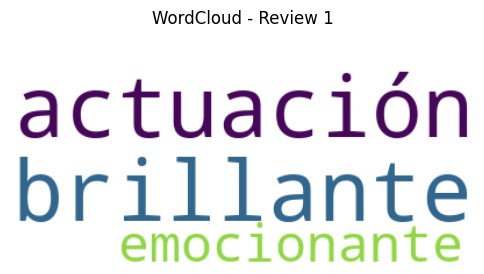

In [ ]:
# Review 0: "Una película emocionante con actuaciones brillantes. ¡Me encantó!"

# Creamos WordCloud con los pesos TF-IDF de esa review
wc = WordCloud(background_color='white')

# Convertimos esa fila del DataFrame a diccionario
frecuencias = df_tfidf.iloc[0].to_dict()

# Generamos la nube de palabras
wc.generate_from_frequencies(frecuencias)

# Mostramos la imagen
plt.figure(figsize=(6, 4))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Review 1")
plt.show()


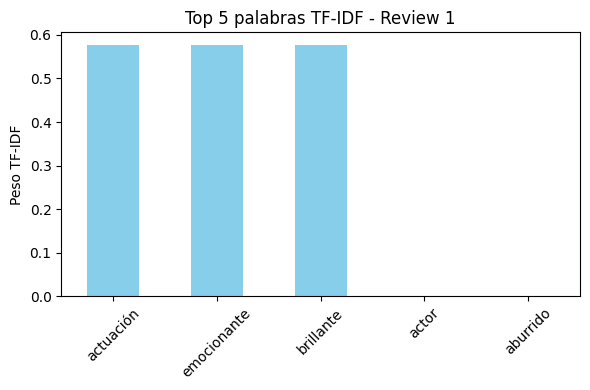

In [ ]:
# Tomamos la fila 0 y ordenamos las palabras por peso TF-IDF
top_palabras = df_tfidf.iloc[0].sort_values(ascending=False).head(5)

# Creamos el gráfico de barras
plt.figure(figsize=(6, 4))
top_palabras.plot(kind='bar', color='skyblue')
plt.title("Top 5 palabras TF-IDF - Review 1")
plt.ylabel("Peso TF-IDF")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Para la review 0 (positiva):

WordCloud con palabras como emocionante, actuación.

Para la review 4 (documental):

Palabras como necesario, sensibilidad, profundidad, tema.

# 8. Brainstorming

Hemos visto BoW y TF-IDF. Son pasos importantes, pero ¿son suficientes?

**¿Cómo podemos representar el texto de manera que se preserve la información relevante y se minimice el ruido?**

*   ¿Qué información crucial **pierden** BoW y TF-IDF? (¡El orden de las palabras! La semántica, la relación entre palabras).
*   "El rey mató a la reina" vs "La reina mató al rey". ¿BoW/TF-IDF las distinguirían bien? (No mucho).
*   ¿Cómo podríamos capturar que "coche" y "auto" significan casi lo mismo? (BoW/TF-IDF las tratan como totalmente diferentes).
*   ¿Qué pasa con la **dimensionalidad**? Si tenemos 50,000 palabras únicas, ¡nuestros vectores tienen 50,000 dimensiones! ¿Es eficiente?
*   ¿Cómo afectan nuestras decisiones de preprocesamiento (stemming vs lematización, quitar o no ciertas palabras) a estas representaciones?

**Próximos pasos (anticipo):**
*   **Word Embeddings (Word2Vec, GloVe, FastText):** Representar palabras como vectores densos (no dispersos como BoW/TF-IDF) en un espacio donde palabras semánticamente similares estén cerca. ¡Capturan significado!
*   **Modelos Secuenciales (RNN, LSTM, GRU):** Redes neuronales diseñadas para procesar secuencias, teniendo en cuenta el orden de las palabras.
*   **Transformers (BERT, GPT):** Arquitecturas más modernas que usan mecanismos de "atención" para entender el contexto de cada palabra en la oración.

**(Discusión en grupo)**

In [ ]:
# ✅ BoW (Bag of Words) y TF-IDF nos ayudan a convertir texto en números.
# Pero tienen limitaciones que pueden afectar el análisis.

# 🔴 Problemas:
# - Pierden el orden de las palabras (no entienden si alguien "mató" o "fue matado").
# - No capturan el significado de las palabras (semántica).
# - No detectan que "coche" y "auto" son sinónimos.
# - Cada palabra se trata como independiente, sin contexto.
# - Las matrices son muy grandes si hay muchas palabras (alta dimensionalidad).

# 📌 Ejemplo clásico:
# - "El rey mató a la reina" y "La reina mató al rey" se ven casi iguales para BoW/TF-IDF.
# - Pero su significado es muy distinto.

# 🤔 ¿Qué información perdemos?
# - Relación entre palabras.
# - Contexto.
# - Sentido del mensaje completo.
# - Variaciones del idioma (jerga, dialectos, lenguaje inclusivo).

# ⚠️ Preprocesamiento influye mucho:
# - Usar stemming puede eliminar diferencias importantes en palabras.
# - Quitar stopwords puede borrar palabras clave en ciertos contextos (como "ella", "nosotros", etc.).

# 🚀 Próximos pasos para mejorar:
# - Word Embeddings (Word2Vec, GloVe, FastText): cada palabra es un vector en un espacio donde las que tienen significados parecidos están cerca.
# - Modelos secuenciales como RNN, LSTM: capturan el orden y contexto de las palabras.
# - Transformers como BERT o GPT: comprenden el contexto completo gracias a la atención.

# 🎯 Objetivo:
# Representar el texto de manera más inteligente para que los modelos "entiendan" lo que se dice, no solo cuántas veces aparece una palabra.


Instalar y cargar spaCy con embeddings

In [6]:
# Instalamos el modelo en español con vectores (esto puede tardar un poco)
!python -m spacy download es_core_news_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 16.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
# Importamos spaCy y cargamos el modelo
import spacy
nlp = spacy.load("es_core_news_md")  # Modelo mediano con vectores semánticos


Comparar palabras similares

In [8]:
# Obtenemos los vectores de palabras
coche = nlp("coche")[0]
auto = nlp("auto")[0]
película = nlp("película")[0]

# Similitud entre palabras
print("Similitud coche-auto:", coche.similarity(auto))  # Cercano a 1 = muy similares
print("Similitud coche-película:", coche.similarity(película))  # Más bajo = no tan similares


Similitud coche-auto: 0.6847264170646667
Similitud coche-película: 0.08302406221628189


Vector de una oración y comparación

In [9]:
# Dos frases parecidas pero con diferente orden
doc1 = nlp("El rey mató a la reina")
doc2 = nlp("La reina mató al rey")

# Similaridad entre oraciones (captura algo de contexto)
print("Similitud entre frases:", doc1.similarity(doc2))


Similitud entre frases: 0.9099435210227966


Vector promedio de las reviews

In [10]:
# Reviews originales
reviews = [
    "Una película emocionante con actuaciones brillantes. ¡Me encantó!",
    "Muy aburrida y lenta. El guión era predecible y los actores no convencían.",
    "Los efectos especiales fueron impresionantes, pero la historia dejaba mucho que desear.",
    "¡Qué gran comedia! Me reí sin parar durante toda la película.",
    "Un documental necesario que aborda temas importantes con profundidad y sensibilidad."
]

# Procesamos con spaCy
docs = list(nlp.pipe(reviews))

# Mostramos el vector promedio de cada review (vector denso)
for i, doc in enumerate(docs):
    print(f"Vector de review {i+1} (primeros 5 valores): {doc.vector[:5]}")


Vector de review 1 (primeros 5 valores): [ 0.01422908 -1.2421327   0.42049226  1.6378264  -2.4651606 ]
Vector de review 2 (primeros 5 valores): [ 1.2137749   1.4092737  -0.69858336 -0.6962506  -1.1362714 ]
Vector de review 3 (primeros 5 valores): [ 1.48806     1.0643457  -0.05676565 -1.2164907   0.9206864 ]
Vector de review 4 (primeros 5 valores): [ 0.19361147 -0.26253143  0.09899179  0.26913413 -1.0728858 ]
Vector de review 5 (primeros 5 valores): [ 1.1327076  -0.13129333 -1.5542892  -0.35944164  0.503674  ]


Estas representaciones sí capturan similitudes semánticas, como que coche y auto son parecidos.

También capturan algo del contexto, aunque modelos más potentes como BERT o GPT lo hacen mucho mejor.

Los vectores no son dispersos como en BoW/TF-IDF. Son densos y eficientes.